Loading streaming history...
Analyzing monthly top songs...
Creating visualization...


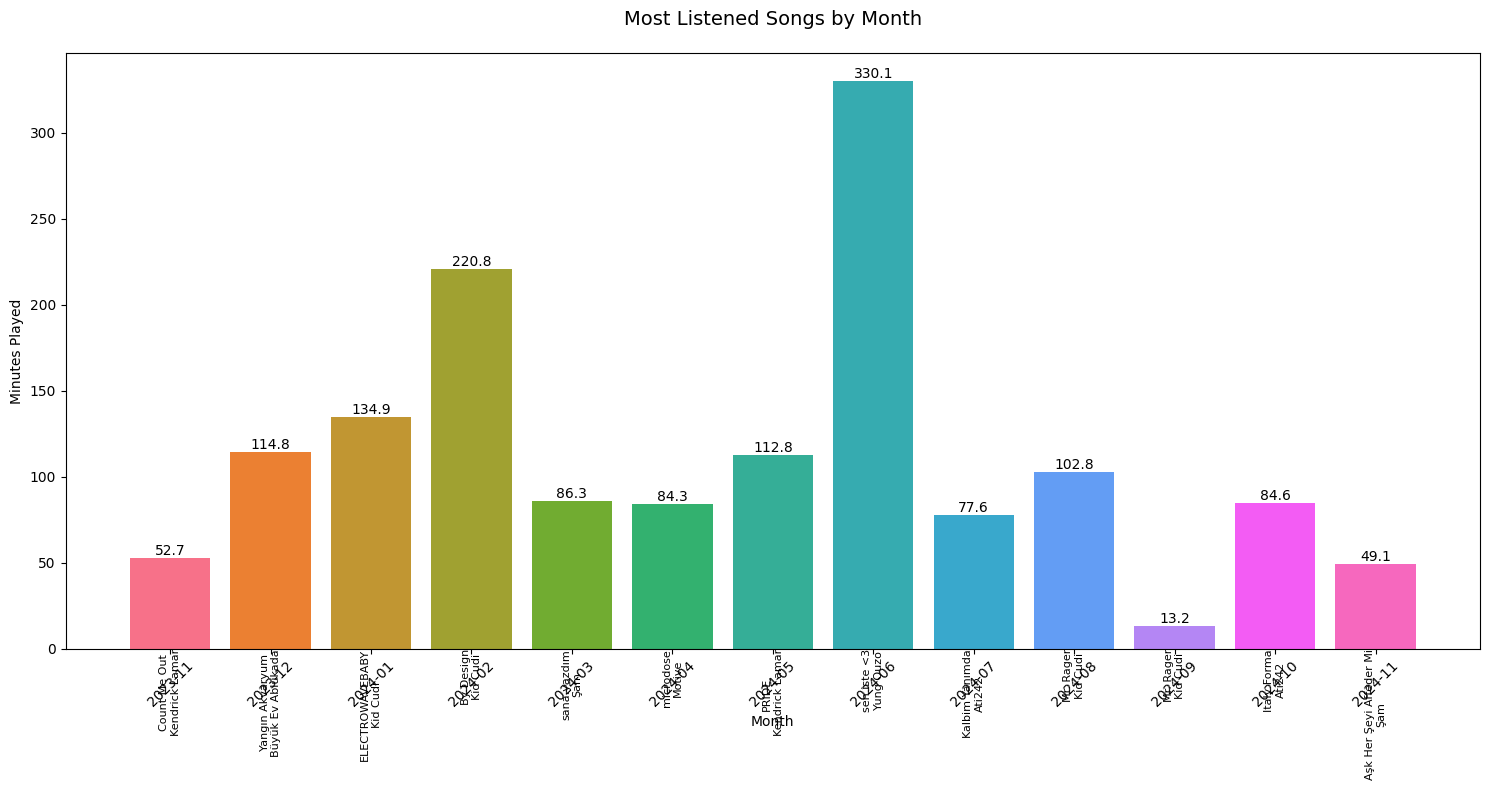


Data saved to monthly_top_songs.csv

Monthly Top Songs Summary:
2023-11: Count Me Out by Kendrick Lamar (52.68 minutes)
2023-12: Yangın Akvaryum by Büyük Ev Ablukada (114.76 minutes)
2024-01: ELECTROWAVEBABY by Kid Cudi (134.95 minutes)
2024-02: By Design by Kid Cudi (220.81 minutes)
2024-03: sana.yazdım by Şam (86.30 minutes)
2024-04: microdose by Motive (84.29 minutes)
2024-05: PRIDE. by Kendrick Lamar (112.84 minutes)
2024-06: sen iste <3 by Yung Ouzo (330.10 minutes)
2024-07: Kalbim Yanımda by Ati242 (77.64 minutes)
2024-08: Mr. Rager by Kid Cudi (102.75 minutes)
2024-09: Mr. Rager by Kid Cudi (13.18 minutes)
2024-10: Italy Forma by Ati242 (84.64 minutes)
2024-11: Aşk Her Şeyi Affeder Mi by Şam (49.14 minutes)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

def load_streaming_history(file_path):
    """
    Load and preprocess streaming history from JSON file
    """
    # Read the JSON file
    df = pd.read_json(file_path)

    # Convert endTime to datetime
    df['endTime'] = pd.to_datetime(df['endTime'])

    # Add useful time columns
    df['date'] = df['endTime'].dt.date
    df['hour'] = df['endTime'].dt.hour
    df['month'] = df['endTime'].dt.to_period('M')

    # Convert msPlayed to minutes
    df['minutes_played'] = df['msPlayed'] / (1000 * 60)

    return df

def get_monthly_top_songs(df):
    """
    Get the most listened songs per month using actual listening duration
    """
    # Group by month, track, and artist, sum the minutes played
    monthly_tracks = df.groupby(['month', 'trackName', 'artistName'])['minutes_played'].sum().reset_index()

    # Get the most played track for each month
    monthly_top_songs = monthly_tracks.loc[monthly_tracks.groupby('month')['minutes_played'].idxmax()]

    return monthly_top_songs

def visualize_monthly_songs(df_top_songs):
    """
    Create visualization for monthly top songs
    """
    plt.figure(figsize=(15, 8))

    # Create bar plot with custom colors
    colors = sns.color_palette("husl", len(df_top_songs))
    bars = plt.bar(range(len(df_top_songs)), df_top_songs['minutes_played'], color=colors)

    # Customize the plot
    plt.title('Most Listened Songs by Month', fontsize=14, pad=20)
    plt.xlabel('Month')
    plt.ylabel('Minutes Played')

    # Set x-axis ticks with month labels
    plt.xticks(range(len(df_top_songs)), [str(month) for month in df_top_songs['month']], rotation=45)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')

    # Add song and artist labels
    for i, (song, artist) in enumerate(zip(df_top_songs['trackName'], df_top_songs['artistName'])):
        plt.text(i, 0, f"{song}\n{artist}",
                ha='center', va='top', rotation=90,
                fontsize=8)

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    plt.savefig('monthly_top_songs.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    try:
        # Load streaming history
        print("Loading streaming history...")
        file_path = "StreamingHistory_music_0.json"  # Update this path to your JSON file location
        df_history = load_streaming_history(file_path)

        # Get monthly top songs
        print("Analyzing monthly top songs...")
        monthly_top_songs = get_monthly_top_songs(df_history)

        # Create visualization
        print("Creating visualization...")
        visualize_monthly_songs(monthly_top_songs)

        # Save the data to CSV
        output_path = "monthly_top_songs.csv"
        monthly_top_songs.to_csv(output_path, index=False)
        print(f"\nData saved to {output_path}")

        # Print summary
        print("\nMonthly Top Songs Summary:")
        for _, row in monthly_top_songs.iterrows():
            print(f"{row['month']}: {row['trackName']} by {row['artistName']} ({row['minutes_played']:.2f} minutes)")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()